# Importando os dados

In [1]:
import pandas as pd

df = pd.read_csv('black_friday_sales.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Entendendo as variáveis

- **User_ID:** ID do cliente
- **Product_ID:** ID do produto
- **Gender:** sexo do cliente (Feminino/Masculino)
- **Age:** faixa etária do cliente
- **Occupation:** ocupação do cliente
- **City_Category:** categoria da cidade do cliente (A, B, C)
- **Stay_In_Current_City_Years:** tempo, em anos, de permanência do cliente na cidade atual
- **Marital_Status:** estado civil do cliente (0 - solteiro, 1 - casado)
- **Product_Category_1:** categoria principal do produto
- **Product_Category_2:** categoria secundária do produto
- **Product_Category_3:** categoria terciária do produto
- **Purchase:** valor da compra (variável alvo)

# Explorando os dados

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
print(f'Total de registros: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Total de registros: 550068
Colunas: 12


## Verificando se há registros duplicados

In [4]:
df.duplicated().sum()

0

## Contabilizando e visualizando os valores ausentes

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

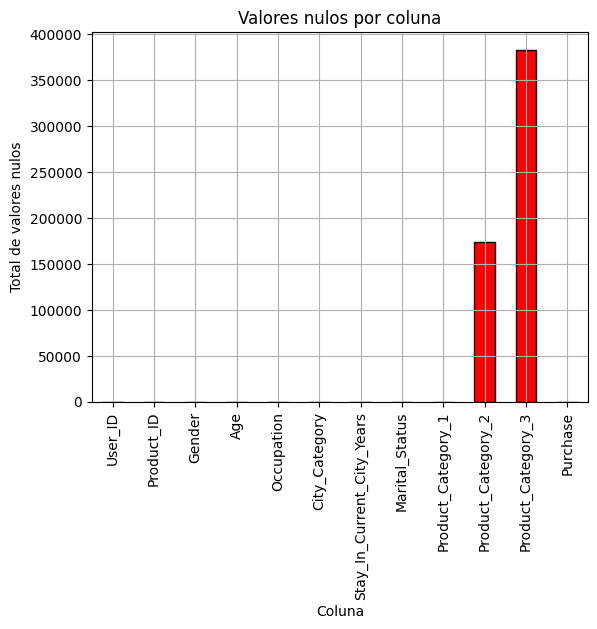

In [6]:
# Visualizando graficamente os valores ausentes
import matplotlib.pyplot as plt

null_counts = df.isnull().sum()

null_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Valores nulos por coluna')
plt.xlabel('Coluna')
plt.ylabel('Total de valores nulos')
plt.grid()

plt.savefig('ausentes.png', bbox_inches='tight')
plt.show()

**Conclusão:** Verificamos que o dataset é formado por 550.068 registros e 12 colunas e contém dados nos tipos int, float e object. As variáveis ***Product_Category_2*** e ***Product_Category_3*** contém bastantes dados ausentes. O dataset não contém valores duplicados.

## Tratando os valores ausentes

Verificamos que as colunas ***Product_Category_2*** e ***Product_Category_3*** tem muitos dados faltantes. Isso acontece porque a maioria dos produtos não tem a uma segunda ou terceira categoria. 

In [7]:
# Calculando a porcentagem de valores ausentes em cada variável

missing_values_cat2 = df['Product_Category_2'].isnull().sum()
missing_values_cat3 = df['Product_Category_3'].isnull().sum()

total_records = len(df)

print(f'A coluna Product_Category_2 tem {((missing_values_cat2 / total_records) * 100):.1f}% dos valores ausentes')
print(f'A coluna Product_Category_3 tem {((missing_values_cat3 / total_records) * 100):.1f}% dos valores ausentes')

A coluna Product_Category_2 tem 31.6% dos valores ausentes
A coluna Product_Category_3 tem 69.7% dos valores ausentes


In [8]:
df.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

Vimos que, nessas colunas, a quantidade de dados ausentes corresponde a uma grande porcentagem dos registros. Dessa forma, optamos por excluir excluí-las.

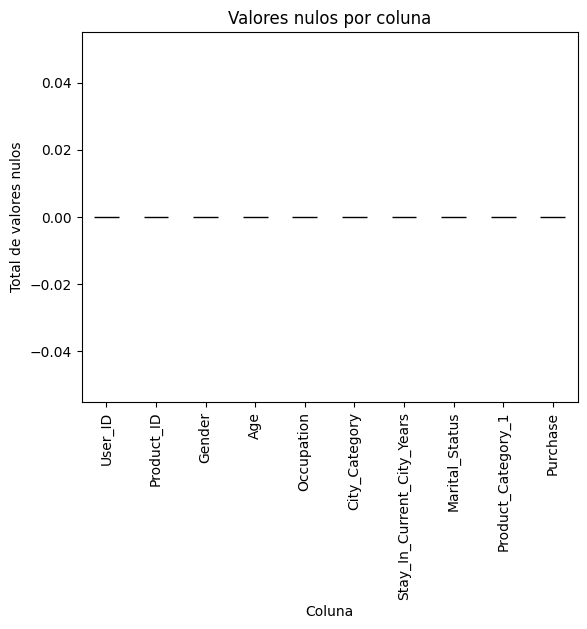

In [9]:
# Verificando graficamente a exclusão dos dados ausentes
null_counts = df.isnull().sum()

null_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Valores nulos por coluna')
plt.xlabel('Coluna')
plt.ylabel('Total de valores nulos')

plt.savefig('ausentes2.png', bbox_inches='tight')
plt.show()

In [10]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

## Analisando a distribuição da variável alvo - Purchase

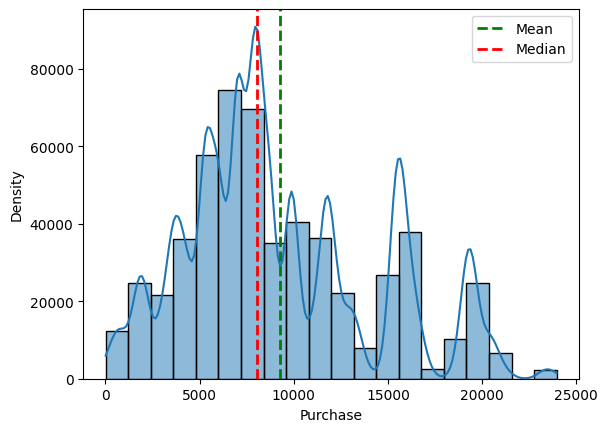

In [11]:
import seaborn as sns
import numpy as np

# Calculando a quantidade de bins do histograma a partir da regra de Sturges
num_bins = int(np.ceil(np.log2(len(df))))

sns.histplot(data=df, x='Purchase', kde=True, bins=num_bins)
plt.xlabel('Purchase')
plt.ylabel('Density')
plt.axvline(df['Purchase'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['Purchase'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.legend()

plt.savefig('distribuicao_purchase.png', bbox_inches='tight')
plt.show()

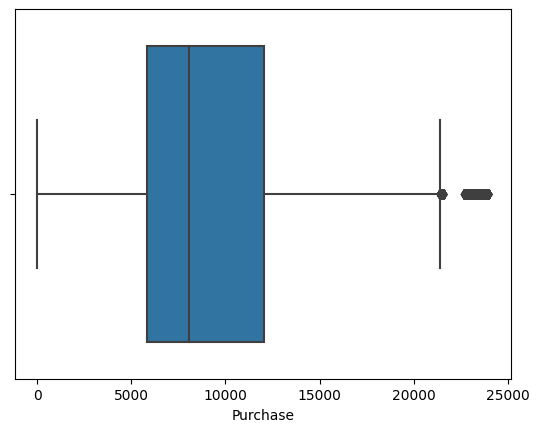

In [12]:
sns.boxplot(x=df['Purchase'])
plt.savefig('boxplot_purchase.png', bbox_inches='tight')
plt.show()

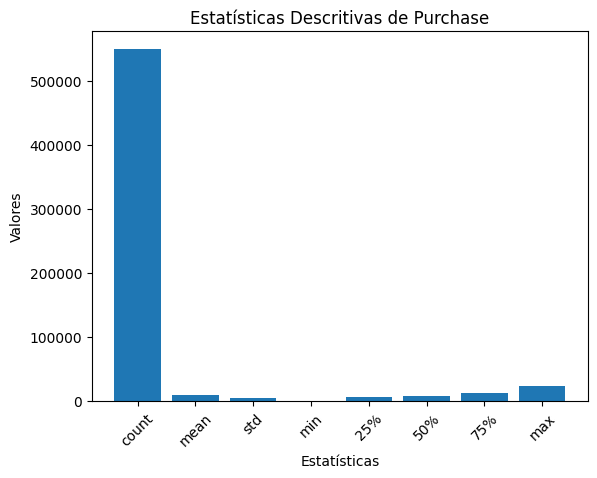

In [13]:
purchase_descr = df['Purchase'].describe()

# Plotando o gráfico das estatísticas descritivas de 'Purchase'
plt.bar(purchase_descr.index, purchase_descr.values)
plt.title('Estatísticas Descritivas de Purchase')
plt.ylabel('Valores')
plt.xlabel('Estatísticas')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x se necessário

# Salvar como imagem
plt.savefig('descr_purchase.png', bbox_inches='tight')
plt.show()

In [14]:
purchase_descr

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

**Conclusões:**

Os gráficos indicam que os dados seguem uma distribuição quase normal, porém, a média maior que a mediana indica uma assimetria à direita na curva representativa dos dados. Também podem ser observados alguns outliers em valores acima de, aproximadamente, 20.000, como representado no boxplot, justificando a assimetria da curva representativa dos dados.

O desvio padrão relativamente alto em relação à média sugere que os valores são dispersos, e a presença de outliers pode ser uma razão para essa dispersão. Os quartis também ajudam a entender como os valores estão distribuídos ao longo do intervalo de dados:

- 25% das compras tem um valor igual ou inferior a $ 5.823,00;
- 50% das compras tem um valor igual ou inferior a $ 8.047,00;
- 75% das compras tem um valor igual ou inferior a $ 12.054,00

A diferença entre o terceiro e o primeiro quartil (IQR) é de aproximadamente 6,231, um IQR relativamente grande também sugere uma dispersão considerável nos dados. A grande diferença entre o terceiro quartil (75%) e o valor máximo (max) reforça a existência de outliers no lado superior da distribuição, indicando observações com valores muito acima da média.

## Analisando as variáveis numéricas através de boxplots

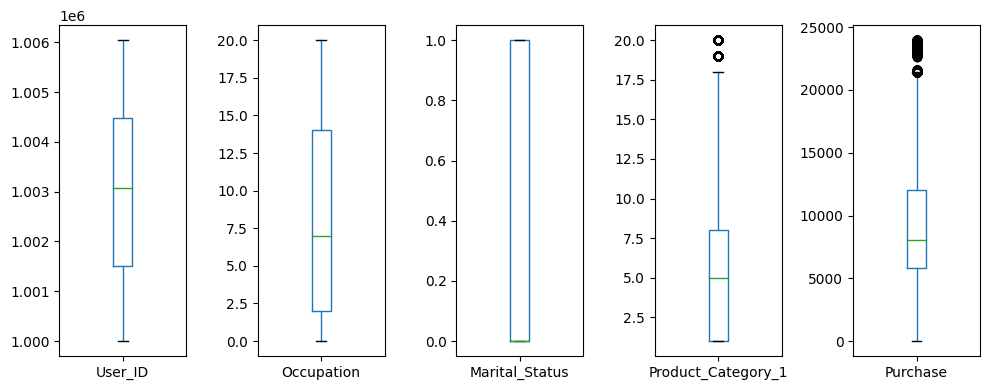

In [15]:
# Plotando o boxplot das variáveis numéricas
df.plot(kind = "box", figsize = (10, 4), subplots = True)
plt.tight_layout()
plt.savefig('/work/outliers.png', bbox_inches='tight')

**Conclusão:** verificamos a existência de outliers nas colunas ***Product_Category_1*** e ***Purchase***. Agora, verificaremos se a quantidade de outliers é significativa para que possamos analisar a melhor forma de tratá-los. Os outliers na primeira coluna referem-se a valores superiores a, aproximadamente, 17.5. Já na coluna target, referem-se a valores superiores a, aproximadamente, 20.000.

### Verificando outliers na coluna Product_Category_1

In [16]:
# Calculando a porcentagem de dados acima de 17,5
category_1_outliers_percent = df[df['Product_Category_1'] > 17.5].shape[0]/df.shape[0] * 100
print(f'Outliers de Product_Category_1: {category_1_outliers_percent:.2f}%')

Outliers de Product_Category_1: 1.32%


### Verificando outliers na coluna Purchase

In [17]:
# Calculando a porcentagem de dados acima de 20000
purchase_outliers_percent = df[df['Purchase'] > 20000].shape[0]/df.shape[0] * 100
print(f'Outliers de Purchase: {purchase_outliers_percent:.2f}%')

Outliers de Purchase: 2.31%


**Conclusão:** a porcentagem de outliers é baixa, então, como temos uma quantidade razoável de dados, optamos por deletar esses registros para que os mesmos não influenciem no estudo.

### Deletando os registros com outliers

In [18]:
df = df.drop(df[(df['Product_Category_1']>17.5) | (df['Purchase']>20000)].index)

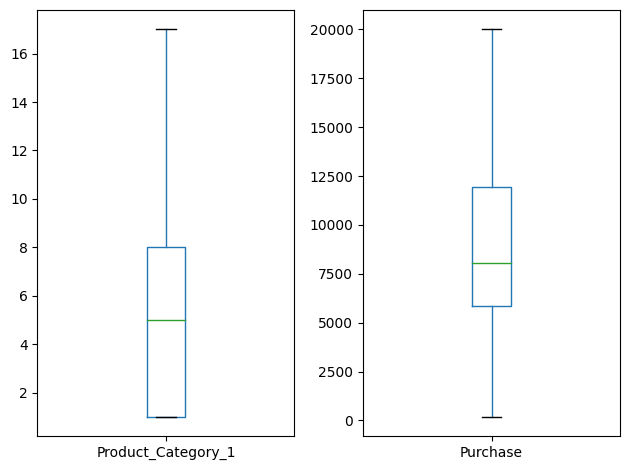

In [19]:
# Visualizando os boxplots das duas colunas após a exclusão dos outliers
columns = ['Product_Category_1', 'Purchase']
df[columns].plot(kind = "box", subplots = True)
plt.tight_layout()

## Analisando a relação entre cada variável e a variável alvo

### Gender x Purchase

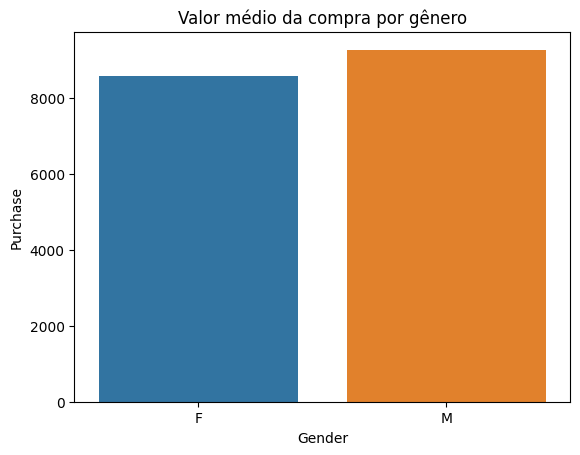

In [20]:
# Calculando a média de "Purchase" por gênero
gender_df = df.groupby('Gender')['Purchase'].mean().reset_index()

# Plotando o gráfico
ax = sns.barplot(x='Gender', y='Purchase', data=gender_df)
plt.title('Valor médio da compra por gênero')

plt.savefig('gender_purchase.png', bbox_inches='tight')
plt.show()

**Conclusão:** em média, homens gastam mais que mulheres.

### Age x Purchase

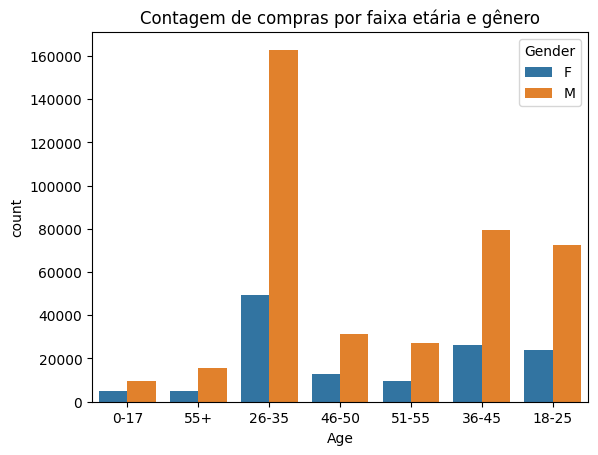

In [21]:
sns.countplot(x=df['Age'], hue=df['Gender'])
plt.title('Contagem de compras por faixa etária e gênero')

plt.savefig('age_purchase.png', bbox_inches='tight')
plt.show()

**Conclusão:** Os maiores consumidores são homens na faixa etária de 26 a 35 anos. Os menores de idade são os que menos consomem.

### Occupation x Purchase

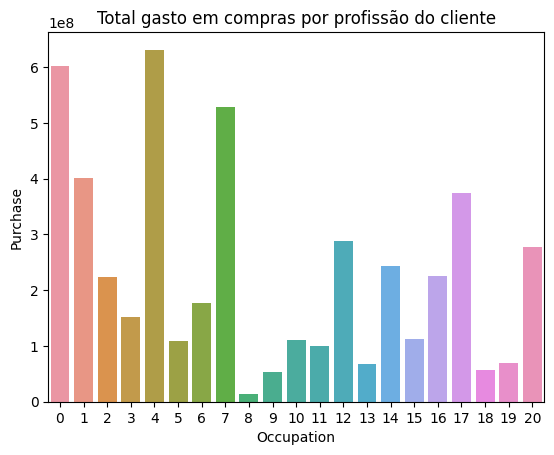

In [22]:
# Calculando o somatório de "Purchase" por profissão
occupation_df = df.groupby('Occupation')['Purchase'].sum().reset_index()

# Plotando o gráfico
ax = sns.barplot(x='Occupation', y='Purchase', data=occupation_df)
plt.title('Total gasto em compras por profissão do cliente')

plt.savefig('occ_purchase.png', bbox_inches='tight')
plt.show()

**Conclusão:** o total gasto em compras varia bastante em relação à profissão do cliente.

### City_Category x Purchase

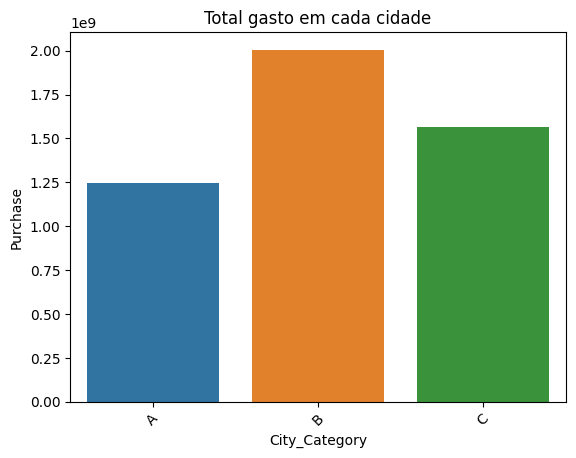

In [23]:
purchase_per_city = df.groupby('City_Category')['Purchase'].sum().reset_index()
sns.barplot(x='City_Category', y='Purchase', data=purchase_per_city)
plt.title('Total gasto em cada cidade')
plt.xticks(rotation=45)

plt.savefig('city_purchase.png', bbox_inches='tight')
plt.show()

**Conclusão:** clientes de cidades da categoria B são os que apresentam os maiores gastos. Isso pode ser influenciado por diversos fatores, como: tamanho da população, nível de renda, demografia, acesso a lojas, necessidades e preferências do consumidor, entre outros.

### Stay_In_Current_City_Years x Purchase

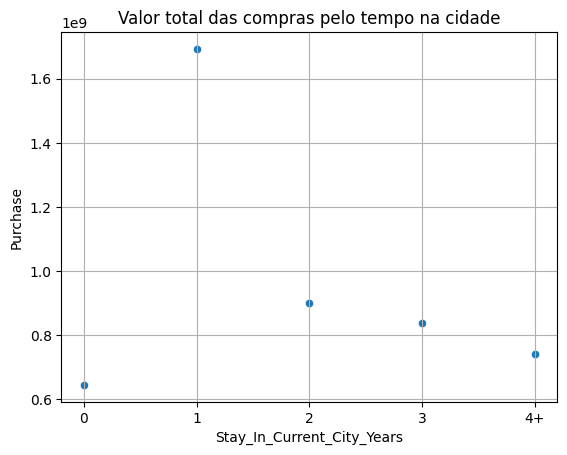

In [24]:
# Calculando a soma das compras de acordo com o tempo na cidade
current_city = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()

sns.scatterplot(data=current_city)
plt.title('Valor total das compras pelo tempo na cidade')
plt.grid()

plt.savefig('years_purchase.png', bbox_inches='tight')

**Conclusão:** pessoas que vivem há mais de um ano na cidade apresentam um gasto mais baixo. Os maiores gastos são de pessoas entre 1 e 2 anos na cidade.

### Marital_Status x Purchase

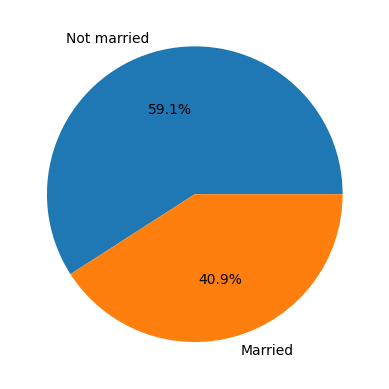

In [25]:
# Fazendo a contagem de cada valor em "Marital_Status"
marital_status = df['Marital_Status'].value_counts()

plt.pie(marital_status, labels=['Not married', 'Married'], autopct='%1.1f%%')

plt.savefig('ms_purchase.png', bbox_inches='tight')
plt.show()

**Conclusão:** Solteiros consomem mais do que os casados

### Product_Category_1 x Purchase

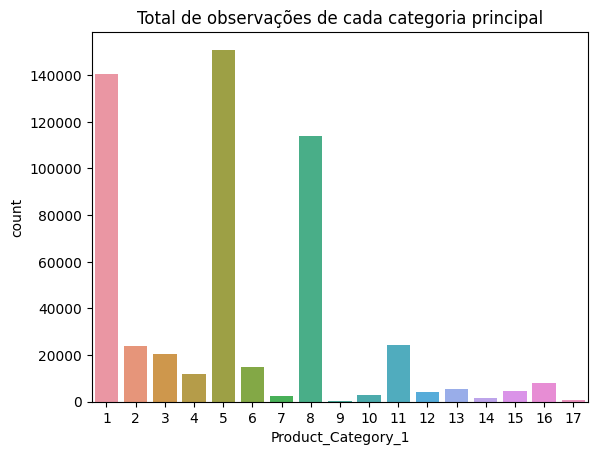

In [26]:
sns.countplot(x=df['Product_Category_1'], data=df)
plt.title('Total de observações de cada categoria principal')

plt.savefig('categories_purchase_1.png', bbox_inches='tight')
plt.show()

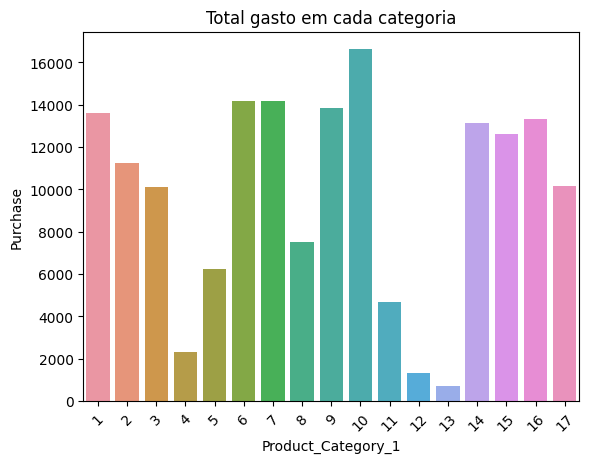

In [27]:
purchase_per_category = df.groupby('Product_Category_1')['Purchase'].mean().reset_index()

sns.barplot(x='Product_Category_1', y='Purchase', data=purchase_per_category)
plt.title('Total gasto em cada categoria')
plt.xticks(rotation=45)

plt.savefig('categories_purchase_2.png', bbox_inches='tight')
plt.show()


**Conclusão:** os produtos com mais vendas são os produtos que tem a categoria 5 como categoria principal, porém, produtos da Categoria 10 promovem compras com o maior valor médio total.

# Preparando os dados

## Excluindo colunas desnecessárias

Como as variáveis ***User_ID*** e ***Product_ID*** são variáveis apenas de identificação do cliente e do produto, respectivamente, optamos por não utilizá-las em nosso modelo. 

Em testes realizados anteriormente, a utilização da variável ***Occupation*** elevou muito o MAE do modelo. Assim, optamos por excluir, também, essa coluna.

In [28]:
clean_df = df.drop(['User_ID', 'Product_ID', 'Occupation'], axis=1)

In [29]:
clean_df.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,A,2,0,3,8370
1,F,0-17,A,2,0,1,15200
2,F,0-17,A,2,0,12,1422
3,F,0-17,A,2,0,12,1057
4,M,55+,C,4+,0,8,7969


## Separando as variáveis dependentes e independentes

In [30]:
x = clean_df.drop(['Purchase'], axis=1)
y = clean_df['Purchase']

In [31]:
x

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,F,0-17,A,2,0,3
1,F,0-17,A,2,0,1
2,F,0-17,A,2,0,12
3,F,0-17,A,2,0,12
4,M,55+,C,4+,0,8
...,...,...,...,...,...,...
545910,M,26-35,B,2,0,8
545911,M,26-35,B,2,0,5
545912,M,26-35,B,2,0,8
545913,M,26-35,B,2,0,5


## Codificando variáveis

As colunas ***Gender***, ***Age***, ***City_Category*** e ***Stay_In_Current_City_Years*** possuem dados categóricos, que precisam ser transformadas em valores numéricos antes de serem usados em um modelo de regressão linear, ou seja, é necessária uma codificação para que o modelo possa interpretar essas categorias.

#### Variáveis *Gender* e *City_Category*

São variáveis categóricas que não apresentam uma relação ordinal natural. Assim, utilizaremos o Dummy Encoding para atribuir um valor numérico único a cada categoria. 

In [32]:
# Aplicando o Dummy Encoding
x['Product_Category_1'] = x['Product_Category_1'].astype(str)

dummy_encoded = pd.get_dummies(x[['Gender', 'City_Category', 'Product_Category_1']], drop_first=True)

# Concatenando as colunas dummy com o DataFrame original
x = pd.concat([x, dummy_encoded], axis=1)

# Removendo as colunas originais categóricas, se desejado
x.drop(['Gender', 'City_Category', 'Product_Category_1'], axis=1, inplace=True)
x.head()

,Age,Stay_In_Current_City_Years,Marital_Status,Gender_M,City_Category_B,City_Category_C,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,...,Product_Category_1_16,Product_Category_1_17,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9
0,0-17,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0-17,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0-17,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0-17,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,55+,4+,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Variáveis *Age* e *Stay_In_Current_City_Years*

São variáveis categóricas que apresentam uma relação ordinal natural. Assim, utilizaremos o *LabelEncoder* para atribuir um valor numérico único a cada categoria. 

In [33]:
from sklearn.preprocessing import LabelEncoder

variables = ['Age', 'Stay_In_Current_City_Years']

# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

for var in variables:
    x[var + '_encoded'] = label_encoder.fit_transform(x[var])

x.drop(['Age', 'Stay_In_Current_City_Years'], axis=1, inplace=True)

x.head()

,Marital_Status,Gender_M,City_Category_B,City_Category_C,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,...,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Age_encoded,Stay_In_Current_City_Years_encoded
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6,4


In [34]:
encoded_data = pd.concat([x,y], axis=1)
encoded_df = pd.DataFrame(encoded_data)

In [35]:
encoded_df

,Marital_Status,Gender_M,City_Category_B,City_Category_C,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,...,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Age_encoded,Stay_In_Current_City_Years_encoded,Purchase
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,8370
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,15200
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,1422
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,1057
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,6,4,7969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545910,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,2,9855
545911,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,2,1962
545912,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,2,7852
545913,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,2,7159


##### **Verificando a correlação entre os dados e a variável alvo após as transformações**

Codificadas as variáveis categórias para o formato numérico, podemos, finalmente, analisar a correlação entre elas e a variável alvo.

In [36]:
encoded_df.corr().Purchase

Marital_Status                       -0.000186
Gender_M                              0.064616
City_Category_B                      -0.021704
City_Category_C                       0.070510
Product_Category_1_10                 0.118443
Product_Category_1_11                -0.206214
Product_Category_1_12                -0.143232
Product_Category_1_13                -0.183903
Product_Category_1_14                 0.046498
Product_Category_1_15                 0.071503
Product_Category_1_16                 0.110940
Product_Category_1_17                 0.007642
Product_Category_1_2                  0.100387
Product_Category_1_3                  0.042900
Product_Category_1_4                 -0.217515
Product_Category_1_5                 -0.384094
Product_Category_1_6                  0.184958
Product_Category_1_7                  0.074093
Product_Category_1_8                 -0.177749
Product_Category_1_9                  0.025602
Age_encoded                           0.016103
Stay_In_Curre

In [37]:
encoded_df.to_csv('encoded_df.csv', index=False)

## Avaliando a necessidade de normalizar/escalonar os dados

In [38]:
x.describe()

,Marital_Status,Gender_M,City_Category_B,City_Category_C,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,...,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Age_encoded,Stay_In_Current_City_Years_encoded
count,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,...,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000,530099.000000
mean,0.409088,0.752063,0.421695,0.308633,0.005376,0.045816,0.007446,0.010468,0.002873,0.008866,...,0.045018,0.038131,0.022171,0.284726,0.028180,0.004646,0.214913,0.000632,2.489377,1.858892
std,0.491666,0.431815,0.493831,0.461930,0.073126,0.209086,0.085967,0.101776,0.053524,0.093743,...,0.207344,0.191512,0.147241,0.451284,0.165486,0.068005,0.410762,0.025131,1.349548,1.289216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000


Observamos que os dados apresentam faixas dinâmicas bastante diferentes. Assim, será necessário escalonar os dados para que todos sigam uma mesma escala de valores.

Para isso, usaremos o StandardScaler. Porém, o escalonamento dos dados enquanto um conjunto integral de dados pode gerar a contaminação do conjunto de testes. Assim, será feita a separação em dados de treino e teste e o escalonamento do conjunto de testes será feito a partir do cálculo feito pelo escalonador no conjunto de treino.

## Separando os grupos de treino e teste e escalonando as variáveis

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

In [40]:
from sklearn.preprocessing import StandardScaler

# Criando uma instância do Scaler
scaler = StandardScaler()

In [41]:
# Aplicando o scaler na base de treino
scaled_x_train = scaler.fit_transform(x_train)

# Aplicando o scaler na base de teste
scaled_x_test = scaler.transform(x_test)

In [42]:
# Criando DataFrames com os dados escalonados e valores de destino
scaled_df_train = pd.DataFrame(scaled_x_train, columns=x.columns)
scaled_df_train['Target'] = y_train.values

scaled_df_test = pd.DataFrame(scaled_x_test, columns=x.columns)
scaled_df_test['Target'] = y_test.values

# Concatenando os DataFrames de treino e teste escalonados
scaled_combined_df = pd.concat([scaled_df_train, scaled_df_test], ignore_index=True)

scaled_combined_df.head()

,Marital_Status,Gender_M,City_Category_B,City_Category_C,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,...,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Age_encoded,Stay_In_Current_City_Years_encoded,Target
0,-0.830998,-1.747476,-0.85532,-0.667780,-0.073057,-0.219112,-0.086329,-0.102473,-0.053295,-0.095174,...,5.023638,-0.151045,-0.631087,-0.16917,-0.068361,-0.523483,-0.024412,-1.841375,0.108670,8370
1,-0.830998,-1.747476,-0.85532,-0.667780,-0.073057,-0.219112,-0.086329,-0.102473,-0.053295,-0.095174,...,-0.199059,-0.151045,-0.631087,-0.16917,-0.068361,-0.523483,-0.024412,-1.841375,0.108670,15200
2,-0.830998,-1.747476,-0.85532,-0.667780,-0.073057,-0.219112,11.583608,-0.102473,-0.053295,-0.095174,...,-0.199059,-0.151045,-0.631087,-0.16917,-0.068361,-0.523483,-0.024412,-1.841375,0.108670,1422
3,-0.830998,-1.747476,-0.85532,-0.667780,-0.073057,-0.219112,11.583608,-0.102473,-0.053295,-0.095174,...,-0.199059,-0.151045,-0.631087,-0.16917,-0.068361,-0.523483,-0.024412,-1.841375,0.108670,1057
4,-0.830998,0.572254,-0.85532,1.497499,-0.073057,-0.219112,-0.086329,-0.102473,-0.053295,-0.095174,...,-0.199059,-0.151045,-0.631087,-0.16917,-0.068361,1.910281,-0.024412,2.599488,1.659296,7969


#### **Verificando a correlação entre os dados após as transformações**



In [43]:
scaled_combined_df.corr().Target

Marital_Status                       -0.000186
Gender_M                              0.064616
City_Category_B                      -0.021704
City_Category_C                       0.070510
Product_Category_1_10                 0.118443
Product_Category_1_11                -0.206214
Product_Category_1_12                -0.143232
Product_Category_1_13                -0.183903
Product_Category_1_14                 0.046498
Product_Category_1_15                 0.071503
Product_Category_1_16                 0.110940
Product_Category_1_17                 0.007642
Product_Category_1_2                  0.100387
Product_Category_1_3                  0.042900
Product_Category_1_4                 -0.217515
Product_Category_1_5                 -0.384094
Product_Category_1_6                  0.184958
Product_Category_1_7                  0.074093
Product_Category_1_8                 -0.177749
Product_Category_1_9                  0.025602
Age_encoded                           0.016103
Stay_In_Curre

Observamos que, de forma geral, as variáveis independentes possuem uma correlação fraca em relação à variável alvo. Isso sugere pouca influência das variáveis de características do cliente e do produto no valor da compra e pode resultar em um modelo de regressão linear com menor capacidade preditiva.

# Aplicando o modelo de regressão linear 

In [44]:
from sklearn.linear_model import LinearRegression

# Criando uma instância do modelo
model = LinearRegression()

# Aplicando o modelo nos dados de treino
reg = model.fit(scaled_x_train, y_train)

# Fazendo as predições utilizando os dados de teste
y_pred = reg.predict(scaled_x_test)

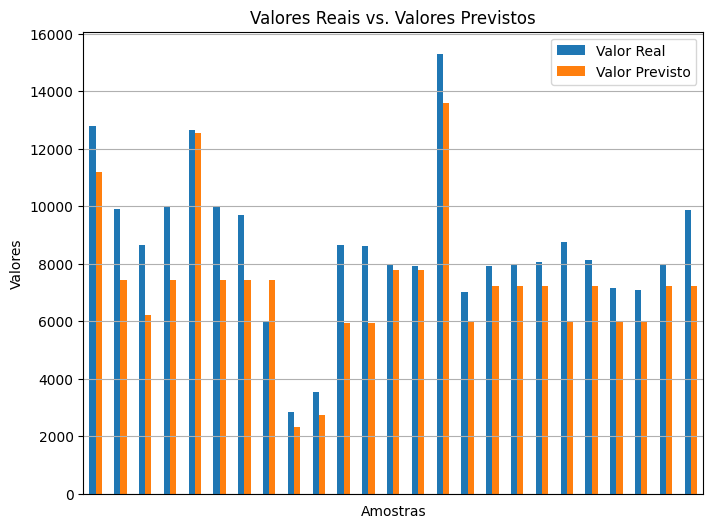

In [45]:
# Visualizando graficamente as valores reais e os valores previstos pelo modelo (25 primeiros resultados)
result_df = pd.DataFrame({'Valor Real': y_test[:25], 'Valor Previsto': y_pred[:25]})

result_df.plot(kind='bar', figsize=(8, 6), xticks=[])
plt.title('Valores Reais vs. Valores Previstos')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.xticks(rotation=45) 
plt.grid()
plt.legend()

plt.savefig('regressao.png', bbox_inches='tight')

plt.show()

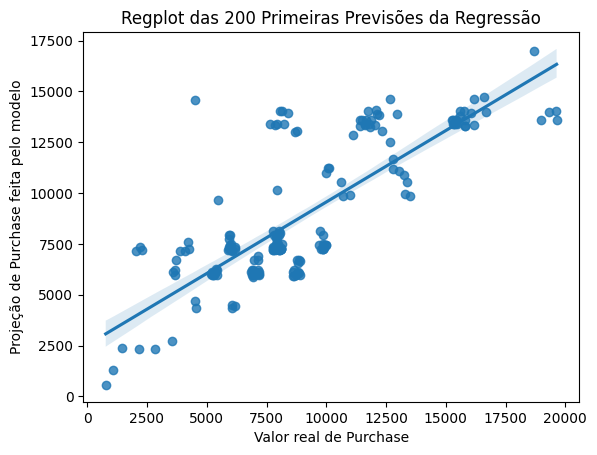

In [46]:
y_test_200 = y_test[:200]
y_pred_200 = y_pred[:200]

sns.regplot(x = y_test_200, y = y_pred_200)
plt.title('Regplot das 200 Primeiras Previsões da Regressão')
plt.xlabel('Valor real de Purchase')
plt.ylabel('Projeção de Purchase feita pelo modelo')

plt.savefig('regplot.png', bbox_inches='tight')
plt.show()

# Avaliando o modelo

In [47]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 8678651.65
RMSE: 2945.96
MAE: 2254.88


In [48]:
metrics_df = pd.DataFrame({'Métricas': ['MSE', 'RMSE', 'MAE'],
                           'Valores': [mse, rmse, mae]})

metrics_df.to_csv('metrics.csv', index=False)

**Conclusão:**

Observamos um MSE alto, o que indica que o modelo está cometendo grandes erros quadráticos em suas previsões, o que não é desejável. O RMSE fornece uma medida do desvio padrão dos erros entre as previsões e os valores reais. O valor encontrado sugere que, em média, os erros têm uma amplitude considerável em relação aos valores reais, o que é bastante alto. O MAE é a média das diferenças absolutas entre as previsões e os valores reais. O valor encontrado para esta métrica indica que, em média, as previsões do modelo estão a aproximadamente 2254.88 unidades de distância dos valores reais.

Assim, as métricas de avaliação indicam que o modelo de regressão linear em questão tem um desempenho limitado na previsão dos dados. O modelo pode não estar capturando adequadamente os padrões nos dados ou pode ser necessário considerar outros modelos mais complexos ou features adicionais para melhorar a precisão das previsões.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf3f5ca1-f92c-402f-9694-a8d356942532' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>